Example script comparing symplectic to non-symplectic numerical integration methods

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#spring constant and particle mass
k = 3.0
m = 0.5
#calculate the revolution period
T = 2*np.pi*np.sqrt(m/k) #2.56

#timestep
#tstep should be small compared to revolution period T.
tstep = 0.01
tmax = 20
t = np.arange(0,tmax,tstep)
tnum = len(t)

#initial conditions
x0 = 1.0
p0 = 0.0
x = np.zeros(tnum)*np.nan
p = np.zeros(tnum)*np.nan
x[0] = x0
p[0] = p0

Euler Method

Don't use this! Use Euler-Cromer instead!

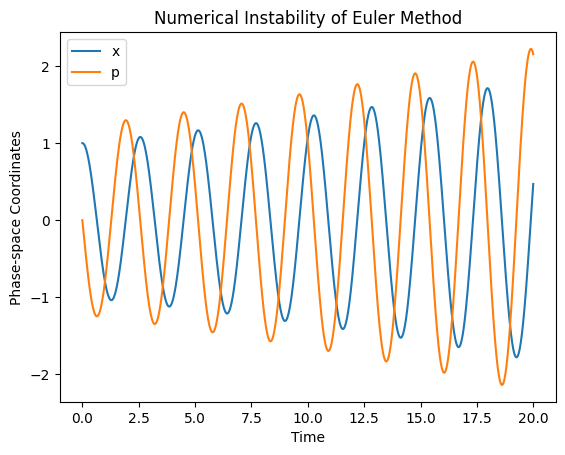

In [31]:
####Euler Method
#Don't use this! Use Euler-Cromer instead!
for lp in range(1,tnum):
  #dxdt = p/m
  #dpdt = -k*x
  x[lp] = x[lp-1] +(p[lp-1]/m)*tstep
  p[lp] = p[lp-1] -(k*x[lp-1])*tstep

#Plot x & p
plt.plot(t,x,label='x')
plt.plot(t,p,label='p')
plt.xlabel('Time')
plt.ylabel('Phase-space Coordinates')
plt.title('Numerical Instability of Euler Method')
plt.legend()
plt.savefig('day2_euler_1.png', bbox_inches='tight')
plt.show()

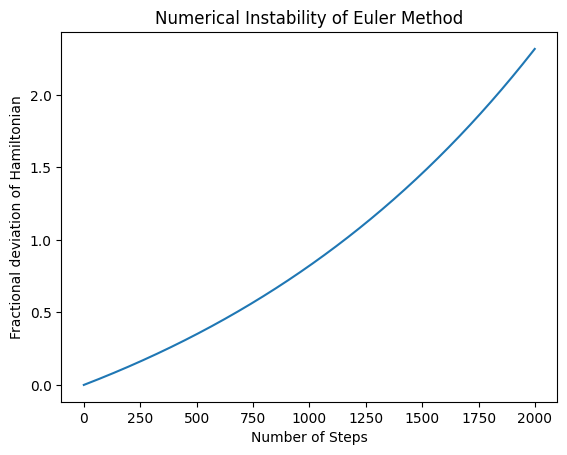

In [32]:
#Calculate Hamiltonian
H = 0.5*k*(x**2) + 0.5*(p**2)/m
dH = H/H[0]-1

#Plot Hamiltonian Non-Conservation
plt.plot(dH)
plt.xlabel('Number of Steps')
plt.ylabel('Fractional deviation of Hamiltonian')
plt.title('Numerical Instability of Euler Method')
plt.savefig('day2_euler_2.png', bbox_inches='tight')
plt.show()

Euler-Cromer Method

This is a symplectic method

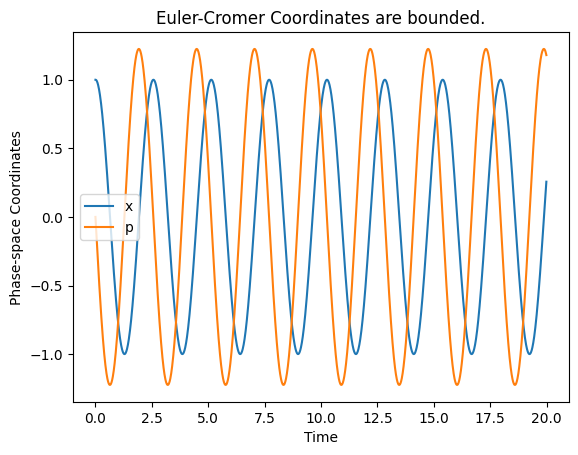

In [33]:
####Euler-Cromer Method
#This is a symplectic method
for lp in range(1,tnum):
  #Can you spot the difference?
  x[lp] = x[lp-1] +(p[lp-1]/m)*tstep
  p[lp] = p[lp-1] -(k*x[lp])*tstep

#Plot x & p
plt.plot(t,x,label='x')
plt.plot(t,p,label='p')
plt.xlabel('Time')
plt.ylabel('Phase-space Coordinates')
plt.title('Euler-Cromer Coordinates are bounded.')
plt.legend()
plt.show()

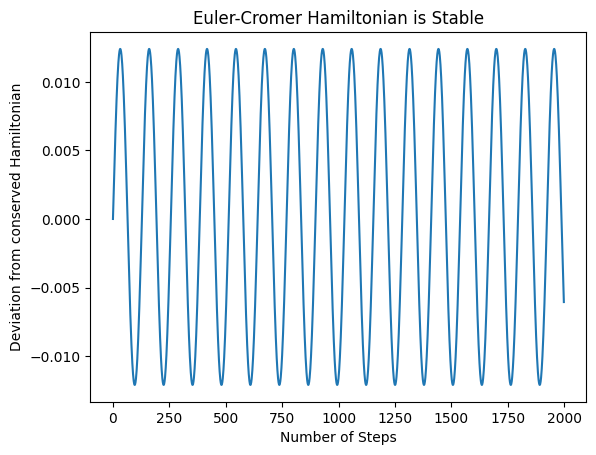

In [34]:
#Calculate Hamiltonian
H = 0.5*k*(x**2) + 0.5*(p**2)/m
dH = H/H[0]-1

#Plot Hamiltonian Non-Conservation
plt.plot(dH)
plt.xlabel('Number of Steps')
plt.ylabel('Deviation from conserved Hamiltonian')
plt.title('Euler-Cromer Hamiltonian is Stable')
plt.savefig('day2_euler_3.png', bbox_inches='tight')
plt.show()

Let's compare the performance of EC with a smaller timestep

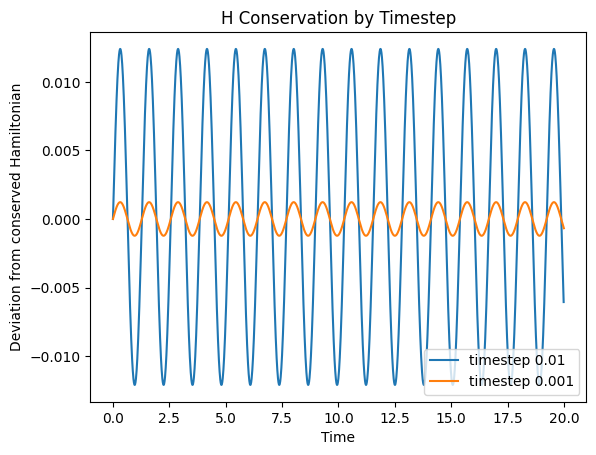

In [35]:
#timestep
tstep = 0.001
tmax = 20
t2 = np.arange(0,tmax,tstep)
tnum = len(t2)

#initial conditions
x = np.zeros(tnum)*np.nan
p = np.zeros(tnum)*np.nan
x[0] = x0
p[0] = p0

#Euler-Cromer
for lp in range(1,tnum):
  x[lp] = x[lp-1] +(p[lp-1]/m)*tstep
  p[lp] = p[lp-1] -(k*x[lp])*tstep

H = 0.5*k*(x**2) + 0.5*(p**2)/m
dH2 = H/H[0]-1

plt.plot(t,dH,label='timestep 0.01')
plt.plot(t2,dH2,label='timestep 0.001')
plt.xlabel('Time')
plt.ylabel('Deviation from conserved Hamiltonian')
plt.title('H Conservation by Timestep')
plt.legend()
plt.show()
